In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("data.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Preprocessinng

In [10]:
df['Gender'] = 1 if 'Male' else 0
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [13]:
df.columns = ['Id','Gender',"Age",'Income',"S_score"]
df.head()

,Id,Gender,Age,Income,S_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [21]:
data = df[['Income','S_score']]
data.head()


,Income,S_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [43]:
w_ss = []
sil_score = []
for k in range(2,15):
    model = KMeans(n_clusters=k,init='k-means++',n_init=100)
    model.fit(data)
    w_ss.append(model.inertia_)
    labels = model.labels_
    sil_score.append(silhouette_score(data,labels))

Elbow Diagram

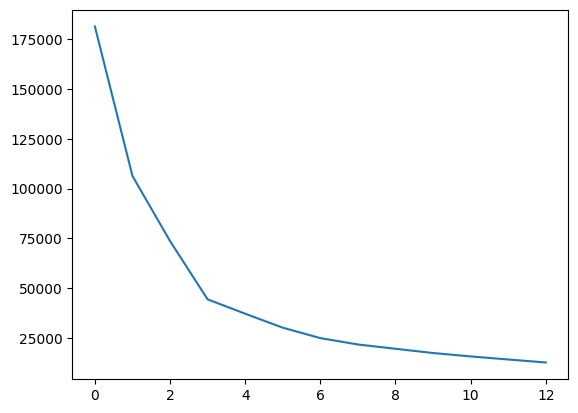

In [44]:
plt.plot(w_ss)
plt.show()

In [49]:
for k,score in enumerate(sil_score):
    print(f"The silhoute score for the {k+2} cluster is {score}")

The silhoute score for the 2 cluster is 0.2968969162503008
The silhoute score for the 3 cluster is 0.46761358158775435
The silhoute score for the 4 cluster is 0.4931963109249047
The silhoute score for the 5 cluster is 0.553931997444648
The silhoute score for the 6 cluster is 0.53976103063432
The silhoute score for the 7 cluster is 0.5281944387251989
The silhoute score for the 8 cluster is 0.4585133619741466
The silhoute score for the 9 cluster is 0.4605043439759829
The silhoute score for the 10 cluster is 0.45056557470336733
The silhoute score for the 11 cluster is 0.4489710248005492
The silhoute score for the 12 cluster is 0.4277810306363958
The silhoute score for the 13 cluster is 0.41550400795673065
The silhoute score for the 14 cluster is 0.4210787919201768


The silhoute score of 5 is greater so 5 is chosen

In [52]:
K = 5
final_model = KMeans(n_clusters=K,init='k-means++',n_init=100)
final_model.fit(data)

labels = final_model.labels_

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_1096\2801166154.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Clusters'] = labels


<Axes: xlabel='S_score', ylabel='Income'>

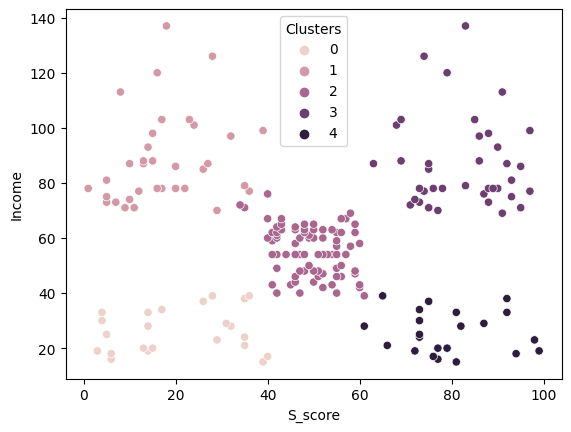

In [56]:
data['Clusters'] = labels
sns.scatterplot(x = "S_score",y="Income",hue="Clusters",data = data)